<a href="https://colab.research.google.com/github/zephyrroche/Spotify-Data-Analysis/blob/main/Spotify_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What are the top 10 most popular tracks?
2. What is the average duration of songs (in minutes)?
3. How many explicit songs are there compared to non-explicit ones?
4. Which year had the most song releases?
5. What is the correlation between energy and danceability?
6. What are the top 5 artists with the most songs in the dataset?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving tracks.csv to tracks.csv


In [38]:
df = pd.read_csv('tracks.csv')

In [39]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# What are the top 10 most popular tracks?

In [41]:
popular = df[['name', 'artists', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
print("Top 10 Most Popular Tracks:")
print(popular)

Top 10 Most Popular Tracks:
                                         name  \
93802  Peaches (feat. Daniel Caesar & Giveon)   
93803                         drivers license   
93804                  Astronaut In The Ocean   
92810                         Save Your Tears   
92811                               telepatía   
93805                     Leave The Door Open   
92813                         Blinding Lights   
92814                            The Business   
92819                                 Bandido   
91866                                 Streets   

                                              artists  popularity  
93802    ['Justin Bieber', 'Daniel Caesar', 'Giveon']         100  
93803                              ['Olivia Rodrigo']          99  
93804                                 ['Masked Wolf']          98  
92810                                  ['The Weeknd']          97  
92811                                  ['Kali Uchis']          97  
93805  ['Bruno Mars', 'A

**The tracks above are the 10 most popular in the dataset, showcasing what listeners have loved the most.**

# What is the average duration of songs (in minutes)?

In [44]:
# Step 1: Take the average of the duration_ms column
duration = df['duration_ms'].mean()

# Step 2: Convert milliseconds to minutes
# 60 seconds in a minute. 1000 milliseconds in a second. So 60000 milliseconds in a minute.
duration_mins = duration / 60000

# Step 3: Print the result
print('Average Duration of Songs:', duration_mins, 'minutes')

Average Duration of Songs: 3.834186121432987 minutes


In [46]:
#to round off the value
print("Average Song Duration:", round(duration_mins, 2), "minutes")
# the 2 means 2 decimal places.

Average Song Duration: 3.83 minutes


**On average, songs in the dataset are around 3 minutes long (3.83 minutes)**

# How many explicit songs are there compared to non-explicit ones?

In [55]:
explicit_songs = df['explicit'].value_counts()
print("Explicit vs Non-Explicit Songs:", explicit_songs)

#0 is the non-explicit and 1 is explicit

Explicit vs Non-Explicit Songs: explicit
0    560808
1     25864
Name: count, dtype: int64


<ipython-input-56-10e00dfde621>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=explicit_songs.index, y=explicit_songs.values, palette='mako')


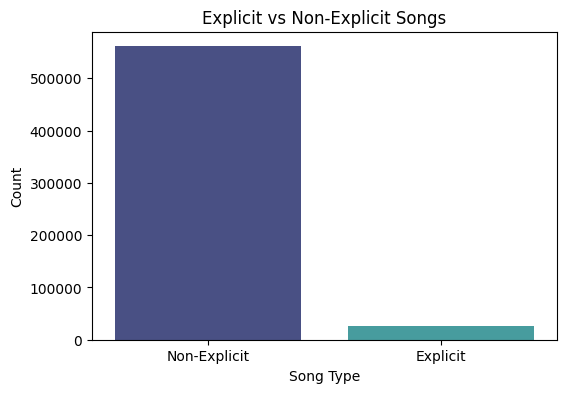

In [56]:
plt.figure(figsize=(6,4))
sns.barplot(x=explicit_songs.index, y=explicit_songs.values, palette='mako')
plt.xticks([0,1], ['Non-Explicit', 'Explicit'])
plt.title('Explicit vs Non-Explicit Songs')
plt.xlabel('Song Type')
plt.ylabel('Count')
plt.show()

**The dataset has significantly more non-explicit songs than explicit ones, indicating a more family-friendly music trend overall.**

# Which year had the most song releases?

In [58]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
#errors='coerce' = "Handle mistakes calmly by making them blank (NaT) instead of crashing."
songs_per_year = df['release_year'].value_counts().sort_index()

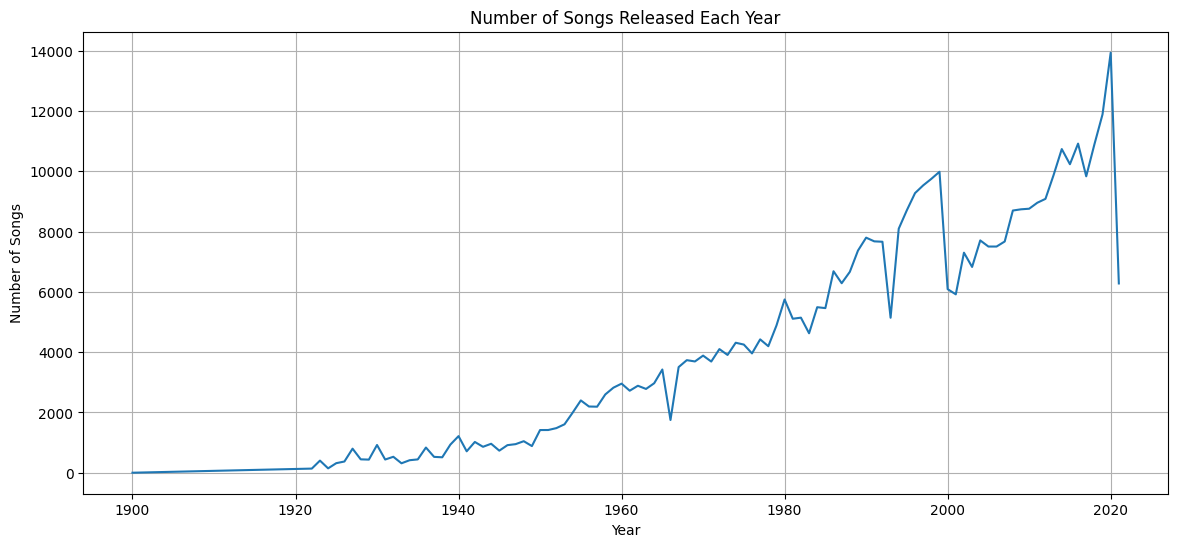

In [59]:
plt.figure(figsize=(14,6))
songs_per_year.plot(kind='line')
plt.title('Number of Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid()
plt.show()

**The year with the most song releases was 2020.**

# What is the correlation between energy and danceability?

In [62]:
correlation = df['energy'].corr(df['danceability'])
print('Correlation between Energy and Danceability:', round(correlation,2))

Correlation between Energy and Danceability: 0.24


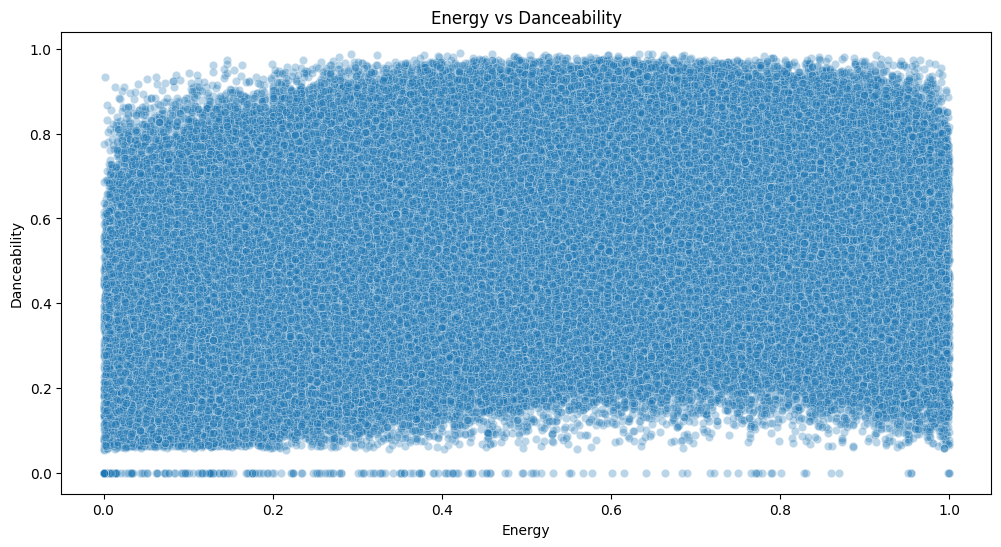

In [66]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='energy', y='danceability', data=df, alpha=0.3)
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

**There is a correlation of 0.24 between energy and danceability, meaning more energetic songs tend to be danceable since the correlation is more than zero.**

# What are the top 5 artists with the most songs in the dataset?

In [68]:
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021.0


In [72]:
df['primary_artist'] = df['artists']
top_artists = df['primary_artist'].value_counts().head(5)
print("Top 5 Artists with Most Songs:", top_artists)

Top 5 Artists with Most Songs: primary_artist
['Die drei ???']         3856
['TKKG Retro-Archiv']    2006
['Benjamin Blümchen']    1503
['Bibi Blocksberg']      1472
['Lata Mangeshkar']      1373
Name: count, dtype: int64
